<h2 style="color:red;text-align:center;font-weight:bold;">AeroStream Analytics</h2>

AeroStream Analytics est un système intelligent de classification automatique des avis clients des compagnies aériennes. Il analyse en temps réel le sentiment des utilisateurs afin de mesurer leur niveau de satisfaction et fournir des indicateurs clés de performance.

**Objectifs :**

Développer un système de classification automatique des avis clients en temps réel, Le
système devra permettre de:

- Collecter et prétraiter les avis clients,

- Analyser automatiquement le sentiment et la satisfaction,

- Générer des indicateurs de performance par compagnie aérienne,

- Visualiser les résultats via un tableau de bord interactif.

![Python](https://img.shields.io/badge/Python-3.9%2B-blue)
![Airflow](https://img.shields.io/badge/Apache%20Airflow-Orchestration-green)
![Streamlit](https://img.shields.io/badge/Streamlit-Dashboard-red)
![ChromaDB](https://img.shields.io/badge/ChromaDB-Vector%20Store-orange)

<br>

<h3 style="color:green;font-weight:bold;">Entraînement et Evaluation :</h3>

<h4 style="color:orange;font-weight:bold;">1. Charger les Données :</h4>

<h5 style="font-weight:bold;">1.1. Etablir la Connexion avec ChromaDB :</h5>

In [1]:
import chromadb

client = chromadb.PersistentClient(path="../chroma_db")

collections = client.list_collections()

print("Collections Disponibles :")

for col in collections:
    print(f"- {col.name}")

Collections Disponibles :
- data


<h5 style="font-weight:bold;">1.2. Récupèrer la Collection :</h5>

In [2]:
collection = client.get_collection(name=collections[0].name)

data = collection.get(include=['embeddings','metadatas'])

<h4 style="color:orange;font-weight:bold;">2. Séparer les Données d'Entraînement et de Test :</h4>

<h5 style="font-weight:bold;">2.1. Séparer X_train, y_train, X_test, y_test :</h5>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize

X = data["embeddings"].tolist()
y = [item['sentiment'] for item in data['metadatas']]

le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_ 
n_classes = len(target_names)

print(f"- Nombre d'Echantillons : {len(X)}")
print(f"- Exemple de Sentiment : {y[0], y_encoded[0]}")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n- Taille X_train : {len(X_train)}")
print(f"- Taille X_test : {len(X_test)}")

- Nombre d'Echantillons : 14220
- Exemple de Sentiment : ('neutral', np.int64(1))

- Taille X_train : 11376
- Taille X_test : 2844


<h5 style="font-weight:bold;">2.2. Equilibrer les Données d'Entraînement :</h5>

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Distribution avant SMOTE (Train) : {Counter(y_train)}")

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Distribution après SMOTE (Train) : {Counter(y_train_res)}")

Distribution avant SMOTE (Train) : Counter({np.int64(0): 7220, np.int64(1): 2374, np.int64(2): 1782})
Distribution après SMOTE (Train) : Counter({np.int64(0): 7220, np.int64(2): 7220, np.int64(1): 7220})


<h4 style="color:orange;font-weight:bold;">3. Entraînement et Evaluation des Modèles ML :</h4>


TRAITEMENT DU MODÈLE : Logistic Regression
Entraînement en Cours ...

- Accuracy : 0.8070
- ROC AUC (OvR) : 0.9274

- Rapport de Classification ---
              precision    recall  f1-score   support

    negative       0.93      0.83      0.88      1805
     neutral       0.59      0.73      0.66       593
    positive       0.72      0.79      0.76       446

    accuracy                           0.81      2844
   macro avg       0.75      0.79      0.76      2844
weighted avg       0.83      0.81      0.81      2844



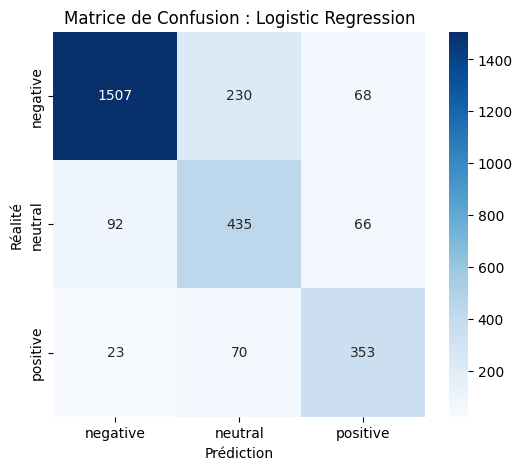

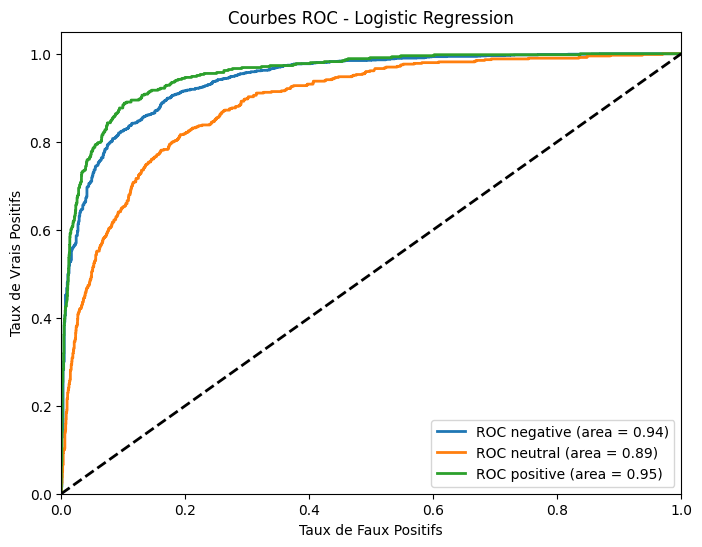

- Génération de la Courbe d'Apprentissage pour Logistic Regression...


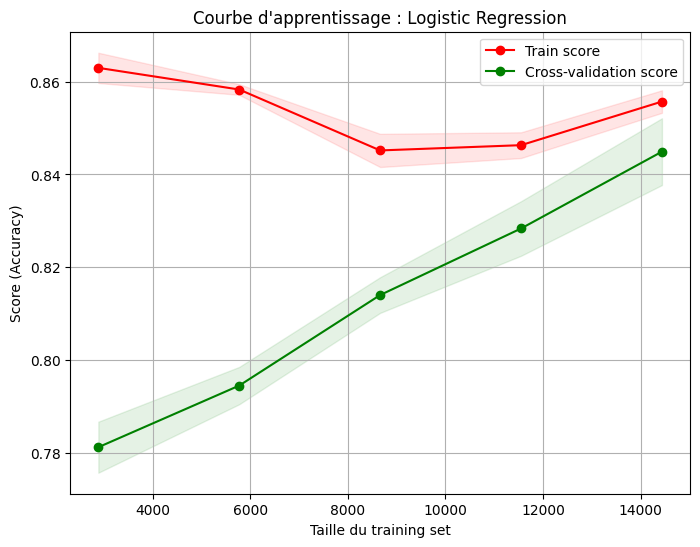


TRAITEMENT DU MODÈLE : Random Forest
Entraînement en Cours ...

- Accuracy : 0.8143
- ROC AUC (OvR) : 0.9185

- Rapport de Classification ---
              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      1805
     neutral       0.62      0.65      0.63       593
    positive       0.79      0.69      0.74       446

    accuracy                           0.81      2844
   macro avg       0.77      0.75      0.75      2844
weighted avg       0.82      0.81      0.81      2844



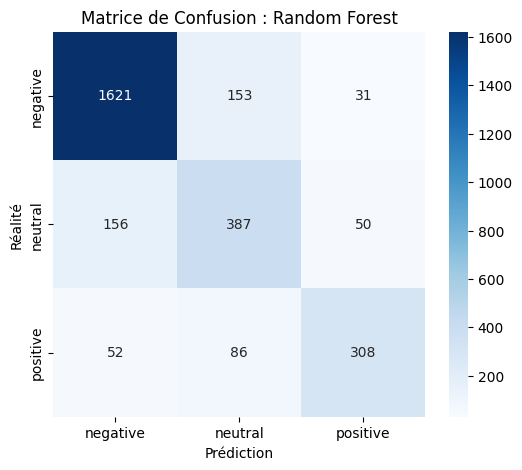

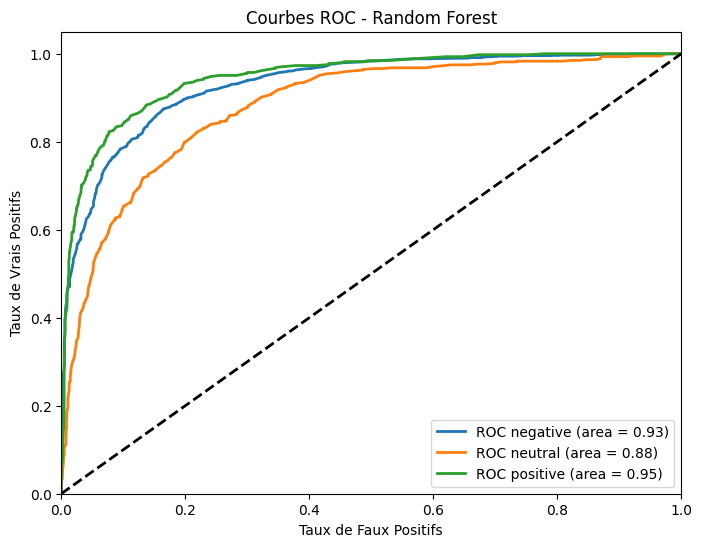

- Génération de la Courbe d'Apprentissage pour Random Forest...


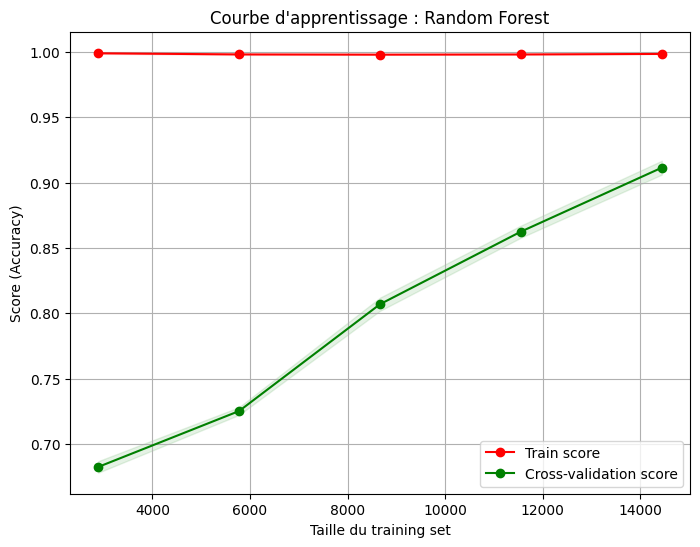


TRAITEMENT DU MODÈLE : Linear SVC (Calibrated)
Entraînement en Cours ...

- Accuracy : 0.8119
- ROC AUC (OvR) : 0.9266

- Rapport de Classification ---
              precision    recall  f1-score   support

    negative       0.92      0.85      0.88      1805
     neutral       0.60      0.72      0.65       593
    positive       0.74      0.79      0.76       446

    accuracy                           0.81      2844
   macro avg       0.75      0.79      0.77      2844
weighted avg       0.83      0.81      0.82      2844



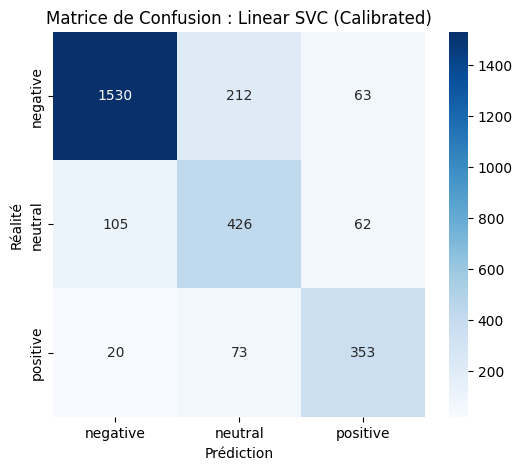

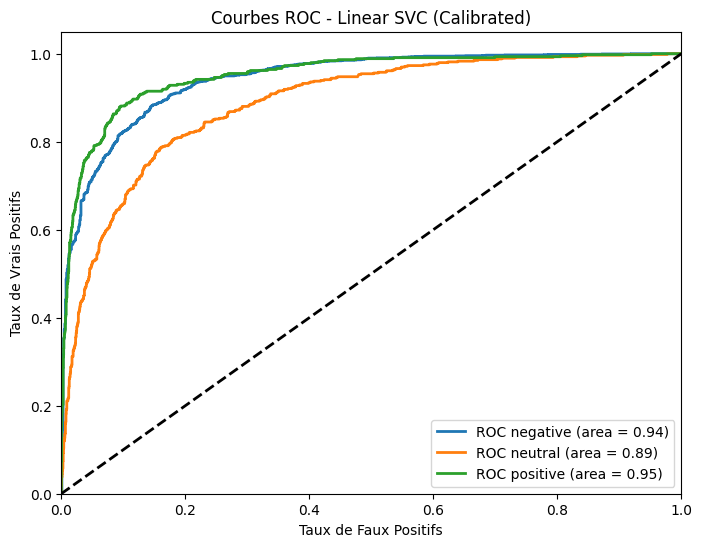

- Génération de la Courbe d'Apprentissage pour Linear SVC (Calibrated)...


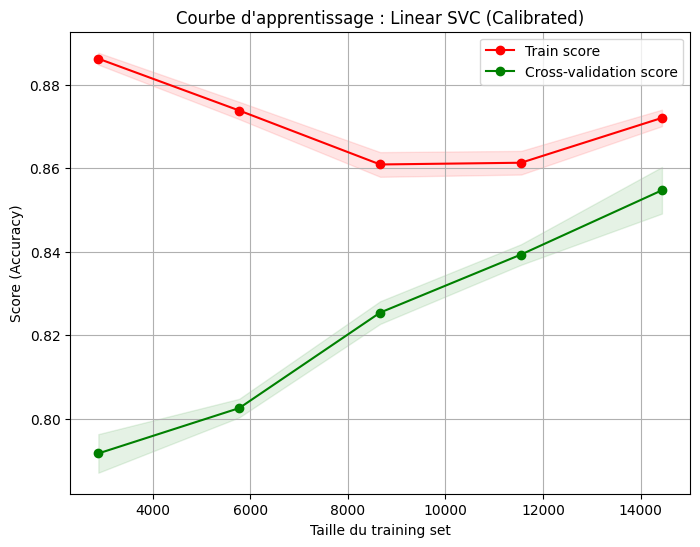

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, auc, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from utils.functions import plot_learning_curve, plot_multiclass_roc, plot_confusion_matrix


y_test_bin = label_binarize(y_test, classes=range(n_classes))

models = {
    "Logistic Regression": LogisticRegression(
        C=1, 
        solver='saga', 
        max_iter=1000, 
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, 
        n_jobs=-1, 
        random_state=42
    ),
    "Linear SVC (Calibrated)": CalibratedClassifierCV(
        estimator=LinearSVC(C=1, dual=False, max_iter=2000, random_state=42),
        method='sigmoid'
    )
}


for name, model in models.items():
    print("\n" + "="*60)
    print(f"TRAITEMENT DU MODÈLE : {name}")
    print("="*60)
    
    print("Entraînement en Cours ...")
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    
    print(f"\n- Accuracy : {acc:.4f}")
    print(f"- ROC AUC (OvR) : {auc_score:.4f}")
    
    print("\n- Rapport de Classification ---")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    plot_confusion_matrix(y_test, y_pred, name, target_names)
    plot_multiclass_roc(y_test_bin, y_prob, name, n_classes, target_names)
    
    print(f"- Génération de la Courbe d'Apprentissage pour {name}...")
    plot_learning_curve(model, name, X_train_res, y_train_res, cv=3)